In [2]:
using Plots

using Revise
using LatticeQM

In [3]:
using LatticeQM.Algebra: σ0, σ1, σ2, σ3
using LatticeQM.Structure.Lattices: Lattice, addbasis!, addorbital!, addorbitals!, addextra!

# Benalcazar, Bernevig, Hughes, Science 357, 61–66 (2017)
function getSSH2D(t1X,t2X, t1Y,t2Y) #t1X,δtX, t1Y,δtY

    lat = Lattice() # 0D lattice
    addbasis!(lat, [1,0]) # 1D lattice
    addbasis!(lat, [0,1]) # 2D lattice
    # addbasis!(lat, [0,0,1], :finite) # 2D lattice with z-coordinates
    addextra!(lat, "sublattice") # non-spatial coordinate
    addorbital!(lat, [0,   0,   2])
    addorbital!(lat, [1/2, 0,   4])
    addorbital!(lat, [0,   1/2, 3])
    addorbital!(lat, [1/2, 1/2, 1])

    lat.specialpoints = LatticeQM.Geometries2D.kdict_sq

    h = DenseHops()
    h[[0,0]] = zeros(Complex, 4,4) # intra cell hops
    h[[0,0]][3,1] = t1X
    h[[0,0]][2,3] = -t1Y
    h[[0,0]][4,2] = t1X
    h[[0,0]][1,4] = t1Y
    h[[0,0]] += h[[0,0]]'

    h[[1,0]] = zeros(Complex, 4,4) # inter cell hops in X
    h[[1,0]][3,1] = t2X
    h[[1,0]][2,4] = t2X
    h[[-1,0]] = h[[1,0]]'

    h[[0,1]] = zeros(Complex, 4,4) # inter cell hops in Y
    h[[0,1]][2,3] = -t2Y
    h[[0,1]][4,1] = t2Y
    h[[0,-1]] = h[[0,1]]'

    
    lat, h
end

getSSH2D (generic function with 1 method)

Computing bands... 100%|████████████████████████████████| Time: 0:00:01


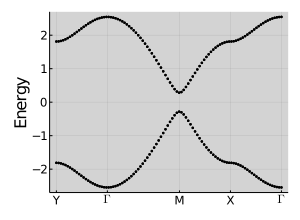

In [4]:
lat, h = getSSH2D(0.8,1.0,0.8,1.0)

ks = kpath(lat; num_points=100)
bands = getbands(h, ks)

plot(bands, size=(300,220))


In [5]:
γs = -1.1:0.02:1.1
energies = Vector{Float64}[]
for γ=γs
    lat, h = getSSH2D(γ,1.0,γ,1.0)
    lat, h = TightBinding.superlattice(lat, h, [10,10])

    append!(energies, [Spectrum.energies(h[[0,0]])])
end

energies = hcat(energies...);

nothing

In [6]:
pyplot()

Plots.PyPlotBackend()

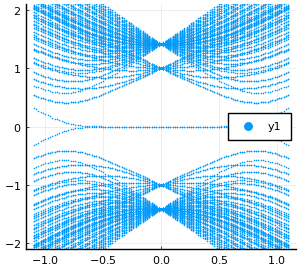

In [7]:
points = [(γ,e) for (γ,es) in zip(γs, eachcol(energies)) for e in es]
scatter(points;  ylims=(-2.1,2.1), markerstrokewidth=0,markersize=1, size=(300,270))

In [9]:
lat, h = getSSH2D(0.5,1.0,0.5,1.0)

en1, U1, p1, en2, U2,p2 = Spectrum.NestedWilson2D(Spectrum.wavefunctions(h), 100, 100,1:2)
nothing

In [10]:
p1

2-element Array{Float64,1}:
 -0.002479215066283682
  0.0024792150662859545

In [11]:
p2

2-element Array{Float64,1}:
 -0.03190122643046049
  0.03190122643046253

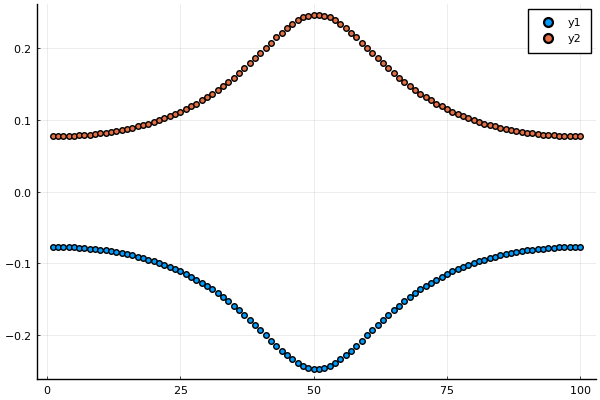

In [95]:
# en1 = mod.(en1, 1.0)
scatter(en1[:,1])
scatter!(en1[:,2])

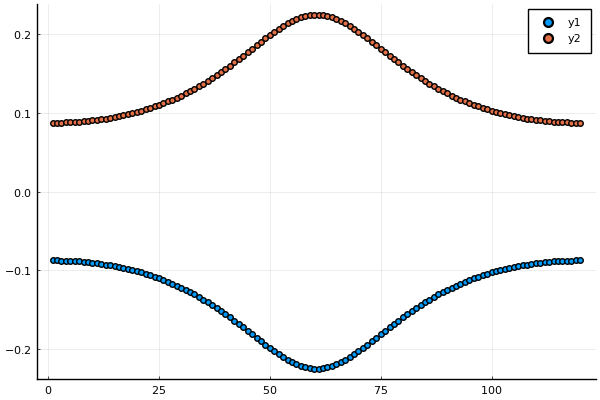

In [22]:
scatter(en2[:,1])
scatter!(en2[:,2])